In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Task 1 – Data Understanding & Preparation**

In [2]:
# 1. Imports
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    RocCurveDisplay,
)
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

DATA_PATH = Path("/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-HR-Employee-Attrition.csv")



1.2 Load data

In [3]:
# 2. Load and inspect the data
df = pd.read_csv(DATA_PATH)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# EDA: structure & summary
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# -----------------------------------------
# 3. EXPLORATORY DATA ANALYSIS
# -----------------------------------------

# Structure
df.info()

# Summary stats
df.describe()

# ---------- 1.3 EDA: key categorical fields ----------
print("Attrition counts:\n", df["Attrition"].value_counts())
print("\nAttrition proportions:\n", df["Attrition"].value_counts(normalize=True))

print("\nOverTime counts:\n", df["OverTime"].value_counts())
print("\nJobRole counts:\n", df["JobRole"].value_counts())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

1.4) One-hot encode and Split into train/test (e.g., 70/30)

In [6]:
# ---------- 1.4 Target, features, encoding, split, scaling ----------

# Create binary target: Yes -> 1, No -> 0
y = (df["Attrition"].str.strip().str.lower() == "yes").astype(int)

# Drop target and identifier
X = df.drop(columns=["Attrition", "EmployeeNumber"], errors="ignore")

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

# One-hot encode categoricals
X_enc = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Optional: stable column order
X_enc = X_enc.reindex(sorted(X_enc.columns), axis=1)

# Train/test split (70/30) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.30, random_state=42, stratify=y
)

# Scale features for models that need it (LogReg, SVM, MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


1.5) Helper function to train and evaluate models

In [7]:
# ============================================
# HELPER: MODEL EVALUATION FUNCTION
# ============================================

def evaluate_model(name, model, Xtr, Xte, ytr, yte):
    """
    Fit model and compute metrics.
    Returns dict with metrics + estimator.
    """
    model.fit(Xtr, ytr)
    y_pred = model.predict(Xte)

    # Get scores for ROC-AUC
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(Xte)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(Xte)
    else:
        y_score = y_pred

    return {
        "model": name,
        "accuracy": accuracy_score(yte, y_pred),
        "precision": precision_score(yte, y_pred, zero_division=0),
        "recall": recall_score(yte, y_pred, zero_division=0),
        "f1": f1_score(yte, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(yte, y_score),
        "confusion_matrix": confusion_matrix(yte, y_pred),
        "estimator": model
    }


# **Task 2 — Baseline: Logistic Regression **

In [8]:
# ============================================
# TASK 2: BASELINE LOGISTIC REGRESSION
# ============================================
from sklearn.linear_model import LogisticRegression

results = []  # will hold core models

# ---------- 2.1 Fit Logistic Regression on scaled data ----------
log_reg = LogisticRegression(max_iter=1000, solver="lbfgs", random_state=42)
lr_result = evaluate_model("Logistic Regression", log_reg,
                           X_train_scaled, X_test_scaled, y_train, y_test)
results.append(lr_result)

# Table of baseline results
results_df = pd.DataFrame([
    {k: v for k, v in r.items() if k not in ["estimator", "confusion_matrix"]}
    for r in results
])

results_df



,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.879819,0.725,0.408451,0.522523,0.820404


In [9]:
# ---------- 2.2 Logistic Regression coefficients ----------
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": log_reg.coef_[0]
}).sort_values("coefficient", ascending=False)

coef_df.head(15)  # top positive predictors of attrition

,feature,coefficient
33,OverTime_Yes,0.868609
1,BusinessTravel_Travel_Frequently,0.689218
20,JobRole_Laboratory Technician,0.670609
44,YearsSinceLastPromotion,0.616252
25,JobRole_Sales Executive,0.613567
26,JobRole_Sales Representative,0.558015
32,NumCompaniesWorked,0.491335
29,MaritalStatus_Single,0.401519
2,BusinessTravel_Travel_Rarely,0.395709
6,DistanceFromHome,0.356526


# **Task 3 – Tree-Based Models (Decision Tree, RF, Gradient Boosting)**

In [ ]:
tree_models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=6, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
}

tree_results = []
feature_importances = {}

for name, model in tree_models.items():
    # Fit model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Store metrics
    tree_results.append({
        "model": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_prob),
    })

    # Store feature importances for tree models
    if hasattr(model, 'feature_importances_'):
        imp_df = pd.DataFrame({
            'feature': X_train.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        feature_importances[name] = imp_df

# Convert results to table
tree_results_df = pd.DataFrame(tree_results)
tree_results_df.sort_values("roc_auc", ascending=False)

,model,accuracy,precision,recall,f1,roc_auc
2,Gradient Boosting,0.841270,0.517241,0.211268,0.300000,0.786486
1,Random Forest,0.832200,0.428571,0.126761,0.195652,0.767568
0,Decision Tree,0.800454,0.270270,0.140845,0.185185,0.585002



TREE MODEL COMPARISON
            model  accuracy  precision   recall       f1  roc_auc
Gradient Boosting  0.841270   0.517241 0.211268 0.300000 0.786486
    Random Forest  0.832200   0.428571 0.126761 0.195652 0.767568
    Decision Tree  0.800454   0.270270 0.140845 0.185185 0.585002

FEATURE IMPORTANCE ANALYSIS


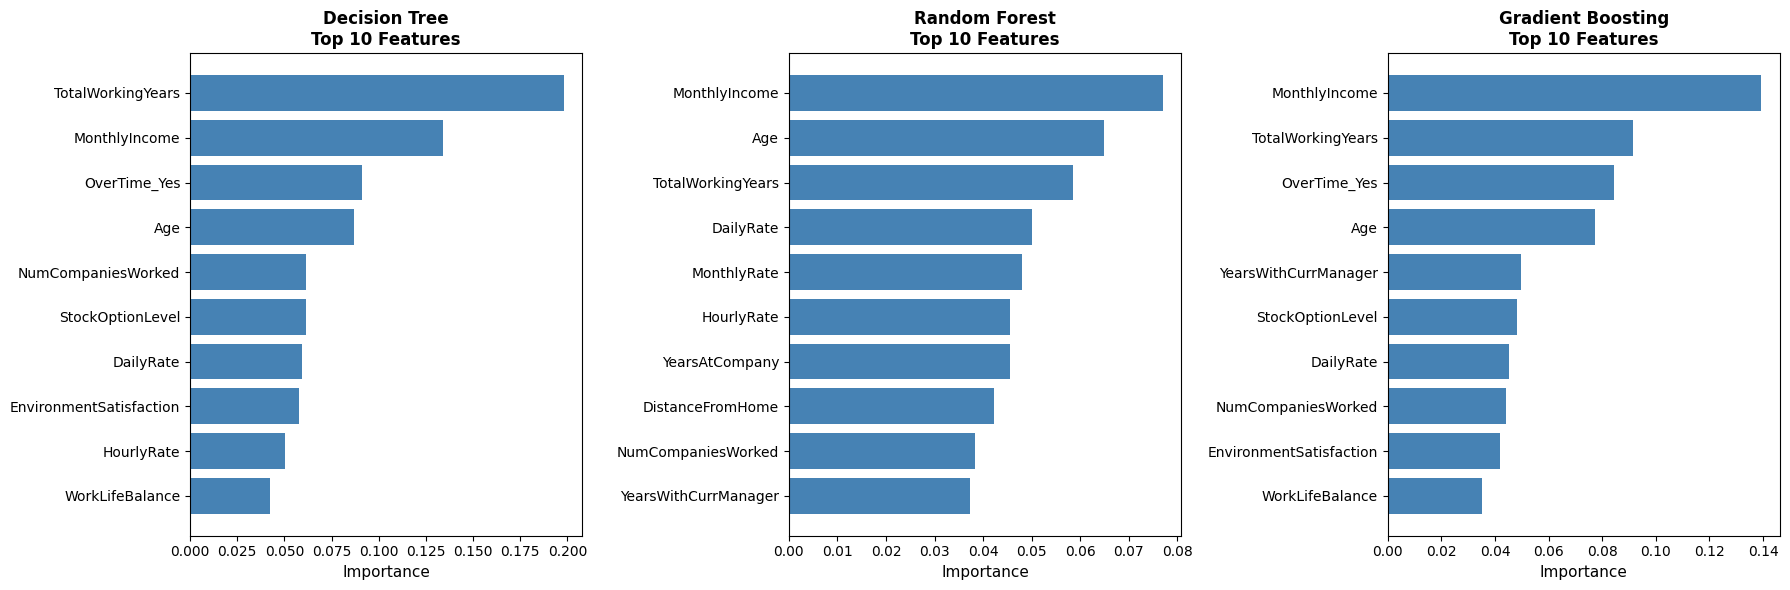


Decision Tree - Top 10 Features:
                feature  importance
      TotalWorkingYears    0.198064
          MonthlyIncome    0.134302
           OverTime_Yes    0.091207
                    Age    0.086875
     NumCompaniesWorked    0.061626
       StockOptionLevel    0.061307
              DailyRate    0.059236
EnvironmentSatisfaction    0.057777
             HourlyRate    0.050557
        WorkLifeBalance    0.042273

Random Forest - Top 10 Features:
             feature  importance
       MonthlyIncome    0.076927
                 Age    0.064927
   TotalWorkingYears    0.058418
           DailyRate    0.050027
         MonthlyRate    0.047930
          HourlyRate    0.045603
      YearsAtCompany    0.045536
    DistanceFromHome    0.042166
  NumCompaniesWorked    0.038253
YearsWithCurrManager    0.037263

Gradient Boosting - Top 10 Features:
                feature  importance
          MonthlyIncome    0.139328
      TotalWorkingYears    0.091475
           OverTime_Yes    

In [ ]:
# Display results
tree_results_df = pd.DataFrame(tree_results)
print("\n" + "="*80)
print("TREE MODEL COMPARISON")
print("="*80)
print(tree_results_df.sort_values('roc_auc', ascending=False).to_string(index=False))

# ==============================================
# FEATURE IMPORTANCE VISUALIZATION
# ==============================================

print("\n" + "="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (model_name, imp_df) in enumerate(feature_importances.items()):
    top_10 = imp_df.head(10)
    axes[idx].barh(top_10['feature'], top_10['importance'], color='steelblue')
    axes[idx].set_xlabel('Importance', fontsize=11)
    axes[idx].set_title(f'{model_name}\nTop 10 Features', fontsize=12, fontweight='bold')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

# Print top features for each model
for model_name, imp_df in feature_importances.items():
    print(f"\n{model_name} - Top 10 Features:")
    print(imp_df.head(10).to_string(index=False))

# **Task 4 – Margin-Based & Neural Models (SVM + MLP)**

In [ ]:
# ============================================
# TASK 4.1: SVM (RBF) TUNING OVER C AND GAMMA
# ============================================

from sklearn.svm import SVC

C_values = [0.1, 1, 10]
gamma_values = ["scale", 0.01, 0.001]

svm_results = []

for C in C_values:
    for gamma in gamma_values:
        svm_model = SVC(
            kernel="rbf",
            C=C,
            gamma=gamma,
            probability=True,
            random_state=42
        )

        res = evaluate_model(
            f"SVM (C={C}, gamma={gamma})",
            svm_model,
            X_train_scaled, X_test_scaled,
            y_train, y_test
        )

        # Save model object separately
        res["model_obj"] = svm_model
        svm_results.append(res)

# Create clean results df (no confusion matrices)
svm_results_df = pd.DataFrame([
    {k: v for k, v in r.items() if k not in ["estimator", "confusion_matrix", "model_obj"]}
    for r in svm_results
]).sort_values("f1", ascending=False)

svm_results_df




,model,accuracy,precision,recall,f1,roc_auc
7,"SVM (C=10, gamma=0.01)",0.854875,0.574468,0.380282,0.457627,0.779596
8,"SVM (C=10, gamma=0.001)",0.873016,0.826087,0.267606,0.404255,0.812676
6,"SVM (C=10, gamma=scale)",0.843537,0.525000,0.295775,0.378378,0.748801
3,"SVM (C=1, gamma=scale)",0.861678,0.857143,0.169014,0.282353,0.810011
4,"SVM (C=1, gamma=0.01)",0.859410,0.909091,0.140845,0.243902,0.825390
0,"SVM (C=0.1, gamma=scale)",0.839002,0.000000,0.000000,0.000000,0.812257
2,"SVM (C=0.1, gamma=0.001)",0.839002,0.000000,0.000000,0.000000,0.810373
1,"SVM (C=0.1, gamma=0.01)",0.839002,0.000000,0.000000,0.000000,0.827332
5,"SVM (C=1, gamma=0.001)",0.839002,0.000000,0.000000,0.000000,0.810430


4.2 — Train Neural Network

In [ ]:
# Select the best SVM based on F1-score
best_svm_row = svm_results_df.iloc[0]  # highest F1 row
best_svm_index = svm_results_df.index[0]
best_svm_model = svm_results[best_svm_index]["model_obj"]

# Add to main results list
results.append({
    "model": "SVM (RBF)",
    "accuracy": best_svm_row["accuracy"],
    "precision": best_svm_row["precision"],
    "recall": best_svm_row["recall"],
    "f1": best_svm_row["f1"],
    "roc_auc": best_svm_row["roc_auc"],
    "estimator": best_svm_model
})


In [ ]:
# ---------- 4.3 Neural Network (MLP) ----------
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)

mlp_clf.fit(X_train_scaled, y_train)

y_pred_mlp = mlp_clf.predict(X_test_scaled)
y_prob_mlp = mlp_clf.predict_proba(X_test_scaled)[:, 1]

mlp_metrics = {
    "model": "Neural Network (MLP)",
    "accuracy": accuracy_score(y_test, y_pred_mlp),
    "precision": precision_score(y_test, y_pred_mlp, zero_division=0),
    "recall": recall_score(y_test, y_pred_mlp, zero_division=0),
    "f1": f1_score(y_test, y_pred_mlp, zero_division=0),
    "roc_auc": roc_auc_score(y_test, y_prob_mlp)
}

mlp_metrics, mlp_clf.n_iter_


y_train_pred_mlp = mlp_clf.predict(X_train_scaled)
train_acc_mlp = accuracy_score(y_train, y_train_pred_mlp)
test_acc_mlp = mlp_metrics['accuracy']

print(f"MLP Training Accuracy: {train_acc_mlp:.4f}")
print(f"MLP Test Accuracy:     {test_acc_mlp:.4f}")
print(f"Accuracy Gap:          {train_acc_mlp - test_acc_mlp:.4f}")
print(f"Iterations to converge: {mlp_clf.n_iter_}")




MLP Training Accuracy: 1.0000
MLP Test Accuracy:     0.8345
Accuracy Gap:          0.1655
Iterations to converge: 190


In [ ]:
# ============================================
# •	Compare performance to logistic regression and tree-based models.
# ============================================

# Start fresh – avoid duplicates
results = []

# 1. Logistic Regression
results.append({
    "model": "Logistic Regression",
    "accuracy": lr_result["accuracy"],
    "precision": lr_result["precision"],
    "recall": lr_result["recall"],
    "f1": lr_result["f1"],
    "roc_auc": lr_result["roc_auc"],
})

# Helper: pick a model result by name from tree_results
def get_tree_result(name):
    return next(r for r in tree_results if r["model"] == name)

dt_result = get_tree_result("Decision Tree")
rf_result = get_tree_result("Random Forest")
gb_result = get_tree_result("Gradient Boosting")

# 2. Decision Tree
results.append({
    "model": "Decision Tree",
    "accuracy": dt_result["accuracy"],
    "precision": dt_result["precision"],
    "recall": dt_result["recall"],
    "f1": dt_result["f1"],
    "roc_auc": dt_result["roc_auc"],
})

# 3. Random Forest
results.append({
    "model": "Random Forest",
    "accuracy": rf_result["accuracy"],
    "precision": rf_result["precision"],
    "recall": rf_result["recall"],
    "f1": rf_result["f1"],
    "roc_auc": rf_result["roc_auc"],
})

# 4. Gradient Boosting
results.append({
    "model": "Gradient Boosting",
    "accuracy": gb_result["accuracy"],
    "precision": gb_result["precision"],
    "recall": gb_result["recall"],
    "f1": gb_result["f1"],
    "roc_auc": gb_result["roc_auc"],
})


# Build final DataFrame and sort
final_results_df = pd.DataFrame(results).sort_values("roc_auc", ascending=False).reset_index(drop=True)
final_results_df

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.879819,0.725000,0.408451,0.522523,0.820404
1,Gradient Boosting,0.841270,0.517241,0.211268,0.300000,0.786486
2,Random Forest,0.832200,0.428571,0.126761,0.195652,0.767568
3,Decision Tree,0.800454,0.270270,0.140845,0.185185,0.585002


# **Task 5 — Model Comparison**

In [ ]:
# ============================================
# FINAL COMBINED RESULTS TABLE (ALL 6 MODELS)
# ============================================

# Start fresh – avoid duplicates
results = []

# 1. Logistic Regression
results.append({
    "model": "Logistic Regression",
    "accuracy": lr_result["accuracy"],
    "precision": lr_result["precision"],
    "recall": lr_result["recall"],
    "f1": lr_result["f1"],
    "roc_auc": lr_result["roc_auc"],
})

# Helper: pick a model result by name from tree_results
def get_tree_result(name):
    return next(r for r in tree_results if r["model"] == name)

dt_result = get_tree_result("Decision Tree")
rf_result = get_tree_result("Random Forest")
gb_result = get_tree_result("Gradient Boosting")

# 2. Decision Tree
results.append({
    "model": "Decision Tree",
    "accuracy": dt_result["accuracy"],
    "precision": dt_result["precision"],
    "recall": dt_result["recall"],
    "f1": dt_result["f1"],
    "roc_auc": dt_result["roc_auc"],
})

# 3. Random Forest
results.append({
    "model": "Random Forest",
    "accuracy": rf_result["accuracy"],
    "precision": rf_result["precision"],
    "recall": rf_result["recall"],
    "f1": rf_result["f1"],
    "roc_auc": rf_result["roc_auc"],
})

# 4. Gradient Boosting
results.append({
    "model": "Gradient Boosting",
    "accuracy": gb_result["accuracy"],
    "precision": gb_result["precision"],
    "recall": gb_result["recall"],
    "f1": gb_result["f1"],
    "roc_auc": gb_result["roc_auc"],
})

# 5. Best tuned SVM (from best_svm_row in svm_results_df)
results.append({
    "model": "SVM (RBF)",
    "accuracy": best_svm_row["accuracy"],
    "precision": best_svm_row["precision"],
    "recall": best_svm_row["recall"],
    "f1": best_svm_row["f1"],
    "roc_auc": best_svm_row["roc_auc"],
})

# 6. Neural Network (MLP)
results.append({
    "model": "Neural Network (MLP)",
    "accuracy": mlp_metrics["accuracy"],
    "precision": mlp_metrics["precision"],
    "recall": mlp_metrics["recall"],
    "f1": mlp_metrics["f1"],
    "roc_auc": mlp_metrics["roc_auc"],
})

# Build final DataFrame and sort
final_results_df = pd.DataFrame(results).sort_values("roc_auc", ascending=False).reset_index(drop=True)
final_results_df

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.879819,0.725000,0.408451,0.522523,0.820404
1,Gradient Boosting,0.841270,0.517241,0.211268,0.300000,0.786486
2,SVM (RBF),0.854875,0.574468,0.380282,0.457627,0.779596
3,Random Forest,0.832200,0.428571,0.126761,0.195652,0.767568
4,Neural Network (MLP),0.834467,0.479167,0.323944,0.386555,0.731024
5,Decision Tree,0.800454,0.270270,0.140845,0.185185,0.585002


5.2 ROC CURVES FOR TOP 3


ROC CURVE COMPARISON


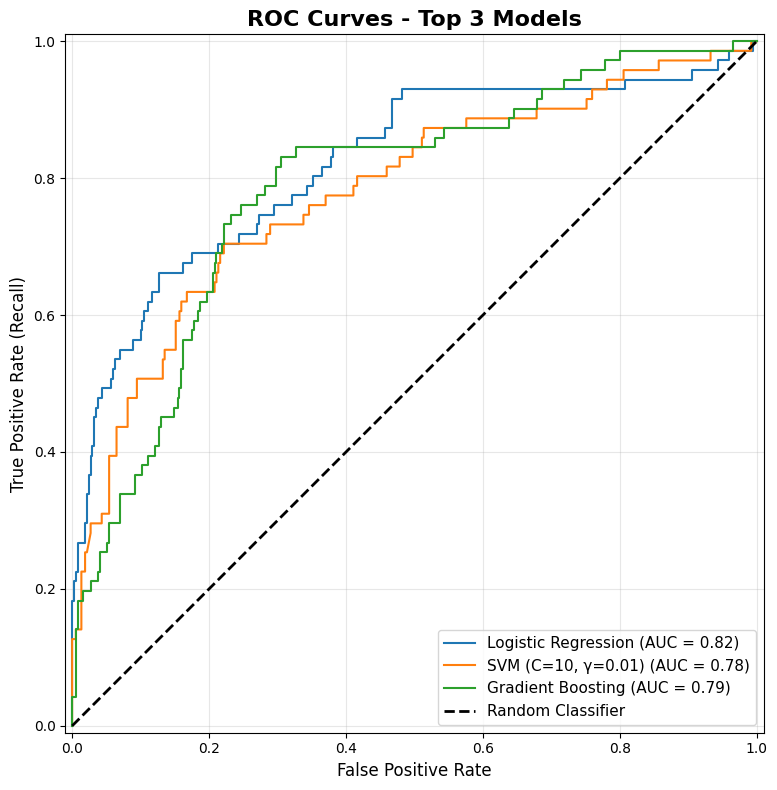

In [ ]:
print("\n" + "="*80)
print("ROC CURVE COMPARISON")
print("="*80)

fig, ax = plt.subplots(figsize=(10, 8))

# Select top 3 models by ROC-AUC
models_to_plot = {
    "Logistic Regression": (log_reg, X_test_scaled),
    f"SVM (C={best_svm_model.C}, \u03b3={best_svm_model.gamma})": (best_svm_model, X_test_scaled),
    "Gradient Boosting": (tree_models["Gradient Boosting"], X_test)
}

for name, (model, X_data) in models_to_plot.items():
    RocCurveDisplay.from_estimator(model, X_data, y_test, ax=ax, name=name)

ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
ax.set_title('ROC Curves - Top 3 Models', fontsize=16, fontweight='bold')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate (Recall)', fontsize=12)
ax.legend(loc='lower right', fontsize=11)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Confusion Matrix

In [ ]:
combined_conf_matrices = {
    "Logistic Regression": confusion_matrix(y_test, log_reg.predict(X_test_scaled)),
    "Decision Tree": confusion_matrix(y_test, tree_models["Decision Tree"].predict(X_test)),
    "Random Forest": confusion_matrix(y_test, tree_models["Random Forest"].predict(X_test)),
    "Gradient Boosting": confusion_matrix(y_test, tree_models["Gradient Boosting"].predict(X_test)),
    "SVM (RBF)": confusion_matrix(y_test, best_svm_model.predict(X_test_scaled)),
    "Neural Network (MLP)": confusion_matrix(y_test, mlp_clf.predict(X_test_scaled))
}


combined_conf_matrices


print("Combined Confusion Matrices:\n")

for model_name, cm in combined_conf_matrices.items():
    print(f"{model_name}")
    print(pd.DataFrame(
        cm,
        index=["Actual Stay", "Actual Leave"],
        columns=["Pred Stay", "Pred Leave"]
    ))
    print("\n" + "-"*50 + "\n")


Combined Confusion Matrices:

Logistic Regression
              Pred Stay  Pred Leave
Actual Stay         359          11
Actual Leave         42          29

--------------------------------------------------

Decision Tree
              Pred Stay  Pred Leave
Actual Stay         343          27
Actual Leave         61          10

--------------------------------------------------

Random Forest
              Pred Stay  Pred Leave
Actual Stay         358          12
Actual Leave         62           9

--------------------------------------------------

Gradient Boosting
              Pred Stay  Pred Leave
Actual Stay         356          14
Actual Leave         56          15

--------------------------------------------------

SVM (RBF)
              Pred Stay  Pred Leave
Actual Stay         350          20
Actual Leave         44          27

--------------------------------------------------

Neural Network (MLP)
              Pred Stay  Pred Leave
Actual Stay         345         